In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
X = pd.read_csv("linearX.csv", names=['X'])
Y = pd.read_csv("linearY.csv", names=['Y'])

df = pd.concat([X, Y], axis=1,)

df.head(5)

,X,Y
0,9.1,0.99523
1,8.0,0.99007
2,9.1,0.99769
3,8.4,0.99386
4,6.9,0.99508


In [20]:
df['X'] = (df['X'] - df['X'].mean())/df['X'].std()
df['Y'] = (df['Y'] - df['Y'].mean())/df['Y'].std()

df.head()

,X,Y
0,0.599375,-0.676051
1,-0.035801,-3.185526
2,0.599375,0.520327
3,0.195172,-1.342326
4,-0.670976,-0.749001


<Axes: xlabel='X'>

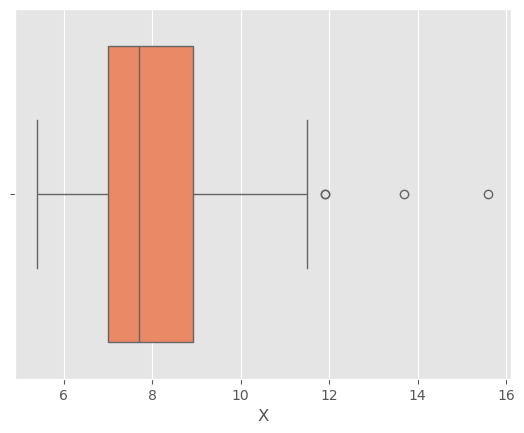

In [22]:
plt.style.use('ggplot')
sns.boxplot(x = df['X'], color='coral' )

<Axes: xlabel='Y'>

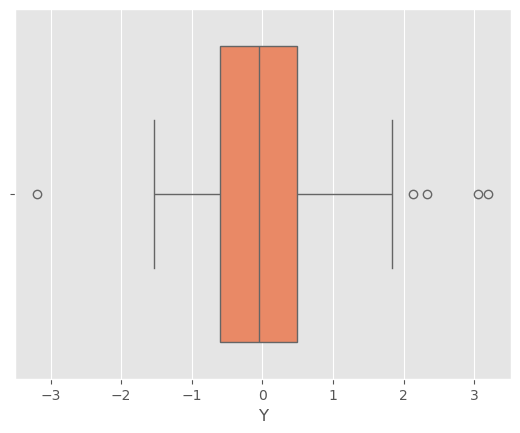

In [24]:
plt.style.use('ggplot')
sns.boxplot(x = df['Y'], color='coral')

In [25]:
X = X.values.flatten()
Y = Y.values.flatten()

X_normalized = (X - np.mean(X)) / np.std(X)
Y_normalized = (Y - np.mean(Y)) / np.std(Y)

In [26]:
def hypothesis(theta0, theta1, x):
    return theta0 + theta1 * x

def compute_cost(X, Y, theta0, theta1):
    m = len(Y)
    cost = (1 / (2 * m)) * np.sum((hypothesis(theta0, theta1, X) - Y) ** 2)
    return cost

# Batch Gradient Descent Function
def batch_gradient_descent(X, Y, lr, max_iters, tol=1e-6):
    m = len(Y)
    theta0, theta1 = 0, 0  # Initialize parameters
    costs = []  # Store cost values

    for i in range(max_iters):
        # Compute gradients
        h = hypothesis(theta0, theta1, X)
        d_theta0 = (1 / m) * np.sum(h - Y)
        d_theta1 = (1 / m) * np.sum((h - Y) * X)

        # Update parameters
        theta0 -= lr * d_theta0
        theta1 -= lr * d_theta1

        # Compute cost
        cost = compute_cost(X, Y, theta0, theta1)
        costs.append(cost)

        # Check for convergence by subtracting last 2 cost values added to cost array
        if i > 0 and abs(costs[-1] - costs[-2]) < tol:
            print(f"Convergence achieved at iteration {i}")
            break

    return theta0, theta1, costs

In [27]:
learning_rate = 0.5
max_iterations = 50
print("Convergence Criteria:")
print("The absolute difference between the cost function values in consecutive iterations is below a tolerance threshold of 1e-6")
print()
theta0, theta1, costs = batch_gradient_descent(X_normalized, Y_normalized, learning_rate, max_iterations)

# Final results
print(f"Final Parameters: theta0 = {theta0:.4f}, theta1 = {theta1:.4f}")
print(f"Final Cost Function Value: {costs[-1]:.4f}")

Convergence Criteria:
The absolute difference between the cost function values in consecutive iterations is below a tolerance threshold of 1e-6

Convergence achieved at iteration 9
Final Parameters: theta0 = -0.0000, theta1 = 0.6544
Final Cost Function Value: 0.2854


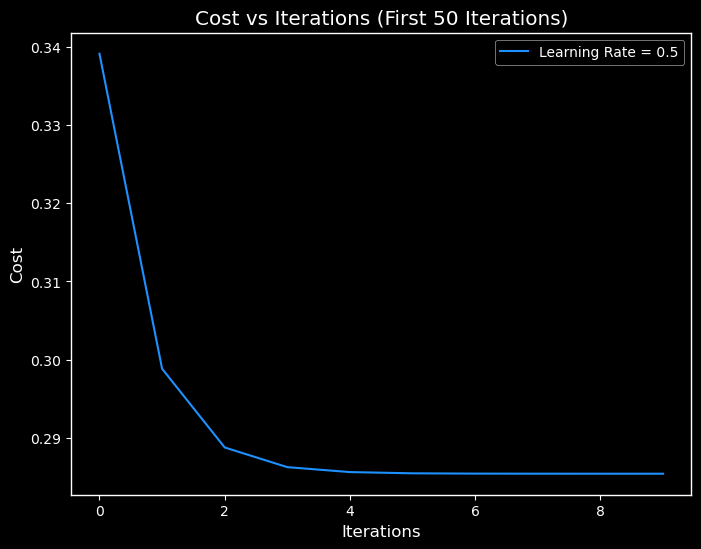

In [28]:
plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
plt.plot(range(min(50, len(costs))), costs[:50], color='dodgerblue', label="Learning Rate = 0.5")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations (First 50 Iterations)")
plt.grid(False)
plt.legend()
plt.show()

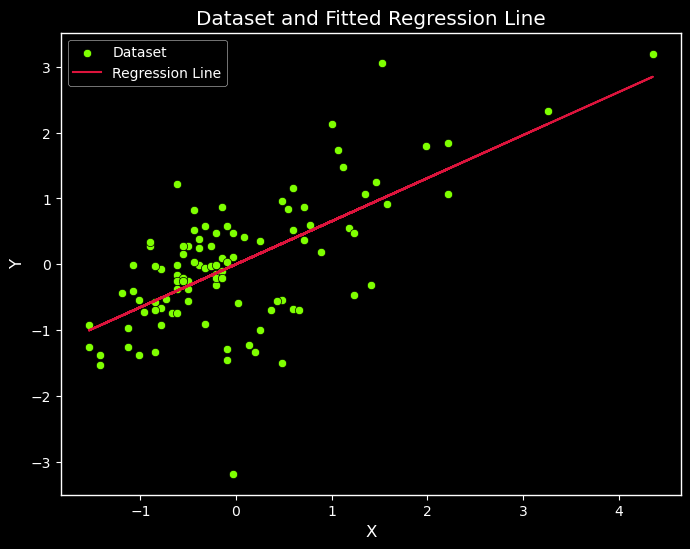

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], color='chartreuse', edgecolor='black', label='Dataset')
plt.plot(df['X'], hypothesis(theta0, theta1, df['X']), color='crimson', label='Regression Line')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Dataset and Fitted Regression Line")
plt.legend()
plt.grid(False)
plt.show()

Convergence achieved at iteration 9


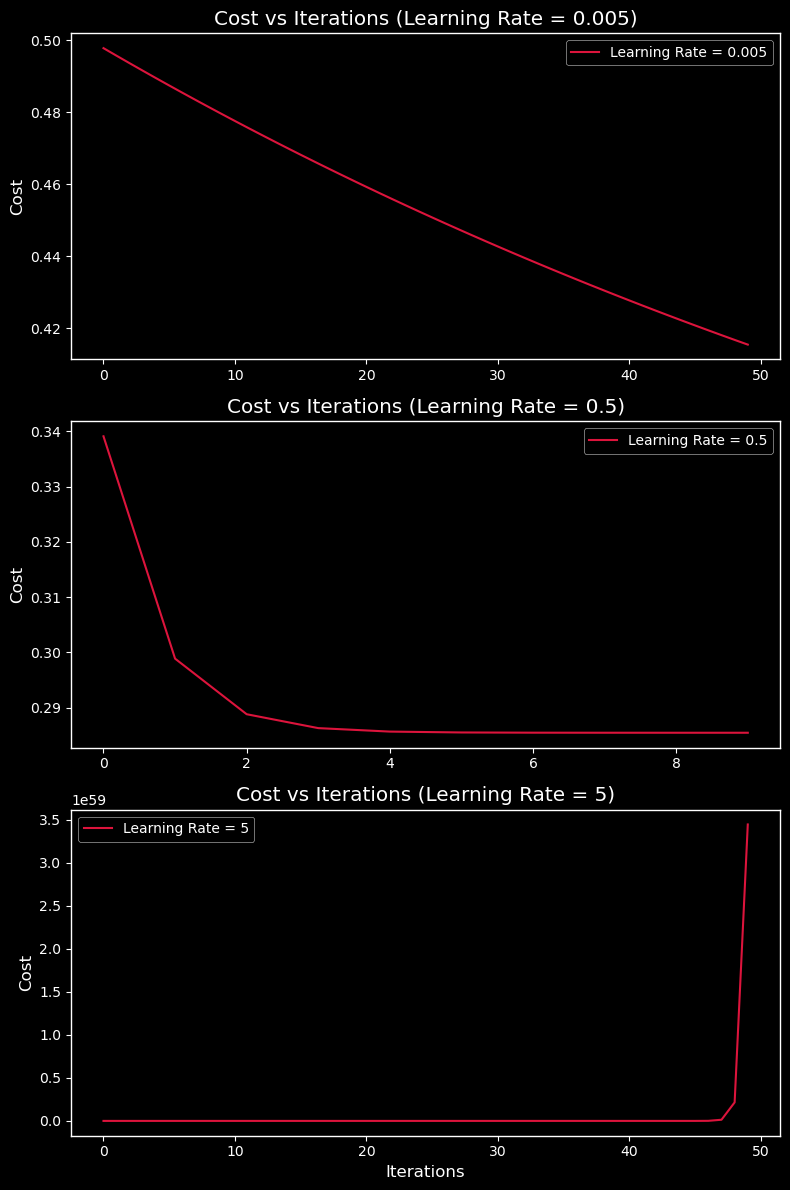

In [30]:
lrs = [0.005, 0.5, 5]
max_iterations = 50

_, _, low = batch_gradient_descent(X_normalized, Y_normalized, lrs[0], max_iterations)
_, _, mid = batch_gradient_descent(X_normalized, Y_normalized, lrs[1], max_iterations)
_, _, high = batch_gradient_descent(X_normalized, Y_normalized, lrs[2], max_iterations)

# Plot cost vs iterations for different learning rates in separate subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=False)

# Learning Rate = 0.005
axes[0].plot(range(len(low[:50])), low[:50], color='crimson', label=f"Learning Rate = {lrs[0]}")
axes[0].set_title(f"Cost vs Iterations (Learning Rate = {lrs[0]})")
axes[0].set_ylabel("Cost")
axes[0].grid(False)
axes[0].legend()

# Learning Rate = 0.5
axes[1].plot(range(len(mid[:50])), mid[:50], color='crimson', label=f"Learning Rate = {lrs[1]}")
axes[1].set_title(f"Cost vs Iterations (Learning Rate = {lrs[1]})")
axes[1].set_ylabel("Cost")
axes[1].grid(False)
axes[1].legend()

# Learning Rate = 5
axes[2].plot(range(len(high[:50])), high[:50], color='crimson', label=f"Learning Rate = {lrs[2]}")
axes[2].set_title(f"Cost vs Iterations (Learning Rate = {lrs[2]})")
axes[2].set_xlabel("Iterations")
axes[2].set_ylabel("Cost")
axes[2].grid(False)
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.grid(False)
plt.show()

In [31]:
# Stochastic Gradient Descent Function
def stochastic_gradient_descent(X, Y, lr, max_iters):
    m = len(Y)
    theta0, theta1 = 0, 0  # Initialize parameters
    costs = []

    for i in range(max_iters):
        for j in range(m):
            xi, yi = X[j], Y[j]
            h = hypothesis(theta0, theta1, xi)
            theta0 -= lr * (h - yi)
            theta1 -= lr * (h - yi) * xi

        # Compute cost
        cost = compute_cost(X, Y, theta0, theta1)
        costs.append(cost)

    return theta0, theta1, costs

# Mini-batch Gradient Descent Function
def mini_batch_gradient_descent(X, Y, lr, max_iters, batch_size=10):
    m = len(Y)
    theta0, theta1 = 0, 0  # Initialize parameters
    costs = []

    for i in range(max_iters):
        # Create mini-batches
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]

        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            Y_batch = Y_shuffled[j:j+batch_size]

            # Compute gradients
            h = hypothesis(theta0, theta1, X_batch)
            d_theta0 = (1 / len(X_batch)) * np.sum(h - Y_batch)
            d_theta1 = (1 / len(X_batch)) * np.sum((h - Y_batch) * X_batch)

            # Update parameters
            theta0 -= lr * d_theta0
            theta1 -= lr * d_theta1

        # Compute cost
        cost = compute_cost(X, Y, theta0, theta1)
        costs.append(cost)

    return theta0, theta1, costs

Convergence achieved at iteration 9


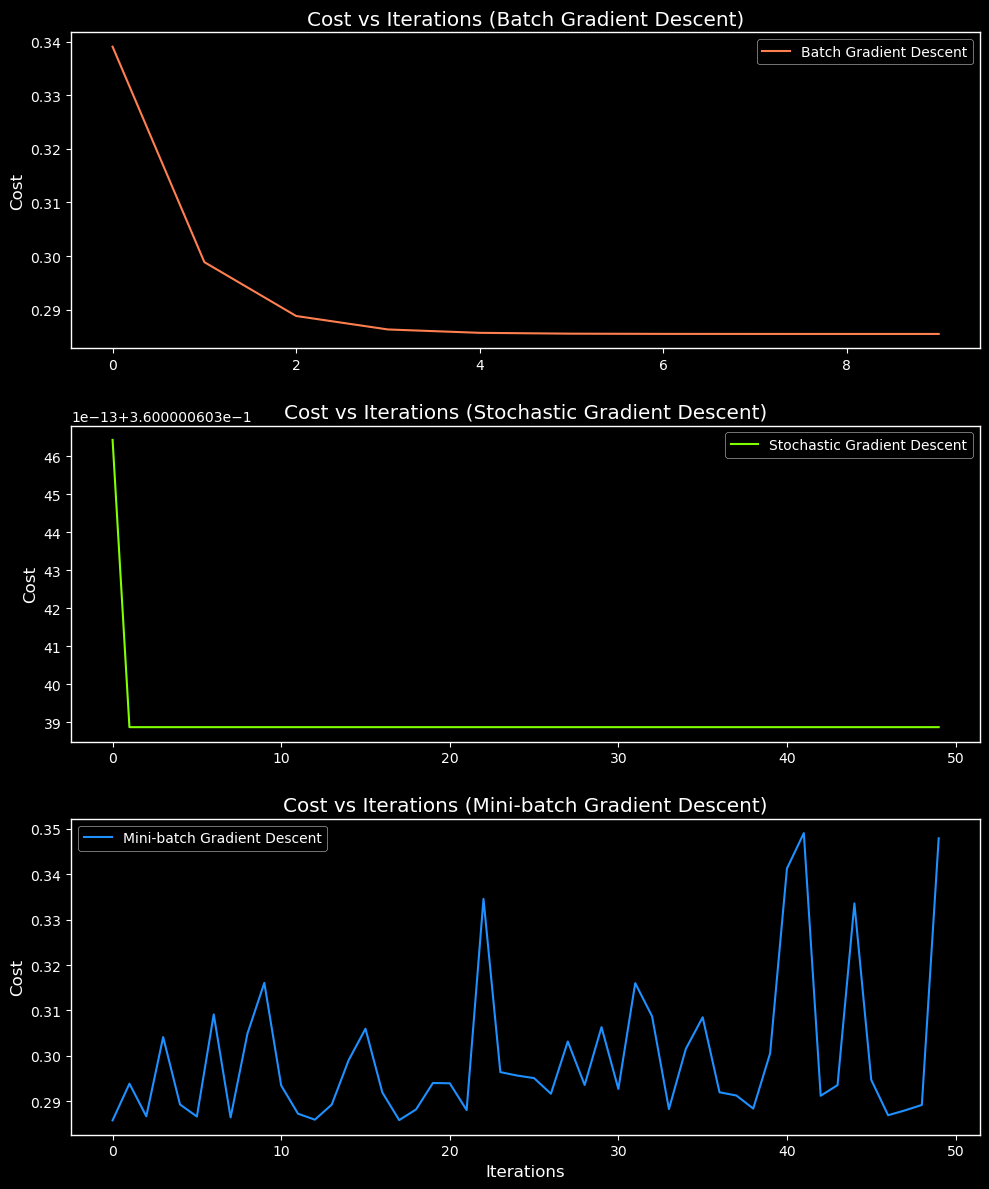

In [32]:
lr = 0.5
max_iters = 50

# Stochastic Gradient Descent
_, _, costs_sgd = stochastic_gradient_descent(X_normalized, Y_normalized, lr, max_iters)

# Mini-batch Gradient Descent
_, _, costs_mbgd = mini_batch_gradient_descent(X_normalized, Y_normalized, lr, max_iters)

# Batch Gradient Descent
_, _, costs_bgd = batch_gradient_descent(X_normalized, Y_normalized, lr, max_iters)

# Plot cost vs iterations for different learning rates in separate subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=False)

# Learning Rate = 0.005
axes[0].plot(range(len(costs_bgd)), costs_bgd, color='coral', label="Batch Gradient Descent")
axes[0].set_title(f"Cost vs Iterations (Batch Gradient Descent)")
axes[0].set_ylabel("Cost")
axes[0].grid(False)
axes[0].legend()

# Learning Rate = 0.5
axes[1].plot(range(len(costs_sgd)), costs_sgd, color='chartreuse', label="Stochastic Gradient Descent")
axes[1].set_title(f"Cost vs Iterations (Stochastic Gradient Descent)")
axes[1].set_ylabel("Cost")
axes[1].grid(False)
axes[1].legend()

# Learning Rate = 5
axes[2].plot(range(len(costs_mbgd)), costs_mbgd, color='dodgerblue', label="Mini-batch Gradient Descent")
axes[2].set_title(f"Cost vs Iterations (Mini-batch Gradient Descent)")
axes[2].set_xlabel("Iterations")
axes[2].set_ylabel("Cost")
axes[2].grid(False)
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()